In the 2SAT problem, you are given a set of clauses, where each clause is the disjunction of two literals (a literal is a Boolean variable or the negation of a Boolean variable). You are looking for a way to assign a value "true" or "false" to each of the variables so that all clauses are satisfied --- that is, there is at least one true literal in each clause. For this problem, design an algorithm that determines whether or not a given 2SAT instance has a satisfying assignment. (Your algorithm does not need to exhibit a satisfying assignment, just decide whether or not one exists.) Your algorithm should run in $O(m+n)$ time, where m and n are the number of clauses and variables, respectively. [Hint: strongly connected components.]

example: $F(x_1, x_2, x_3)=(\neg{x_1} \lor x_2) \land (x_1 \lor x_2) \land (x_1 \lor \neg{x_2})$

Let's use hint!

Since we have to use SCC concept, we need to determine what should be nodes and edges in our Graph.

First idea is to use variables $x_i, \neg{x_i}$ as nodes. Then let's say that there is edge $x_i \to x_j$ if they there is such disjunction in the formula $F$. Additionaly, we can say that the disjunctions $x_i \lor \neg{x_j}$ always exists in the formula.

Unfortunately this graph doesn't work, since both formulas $(\neg{x_1} \lor x_2) \land (x_1 \lor x_2) \land (x_1 \lor \neg{x_2})$ and $(\neg{x_1} \lor x_2) \land (x_1 \lor x_2) \land (x_1 \lor \neg{x_2}) \land (\neg{x_1} \lor \neg{x_2})$ are "strongly connected under this asssumptions".

I failed to get the idea myself, so the solution is to overwrite every disjunction as implication:

$$a \lor b = \neg{a} \to b = \neg{b} \to a$$

Hence from $F$ we can take next implications:

$x_1 \to x_2, \neg{x_2} \to \neg{x_1}, \neg{x_1} \to x_2, \neg{x_2} \to x_1, \neg{x_1} \to \neg{x_2}, x_2 \to x_1$

Let's draw this as graph

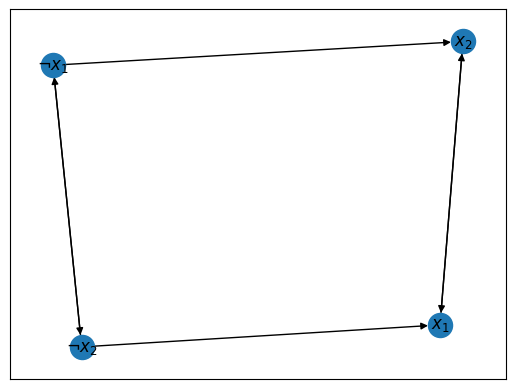

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ['$x_1$', '$x_2$'], 
    ['$\\neg{x_2}$', '$\\neg{x_1}$'], 
    ['$\\neg{x_1}$', '$x_2$'], 
    ['$\\neg{x_2}$', '$x_1$'], 
    ['$\\neg{x_1}$', '$\\neg{x_2}$'], 
    ['$x_2$', '$x_1$']])
nx.draw_networkx(G)
plt.show()

now we see, that $x_2, x_1$ and $\neg{x_1}, \neg{x_2}$ are SCC, but the graph is not SCC itself.
However, if we add $(\neg{x_1} \lor \neg{x_2})$, then we will have one SCC:

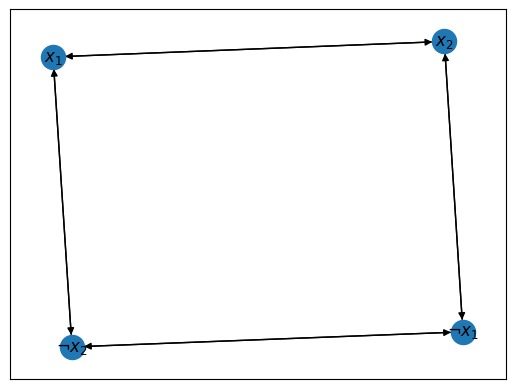

In [23]:
G = nx.DiGraph()
G.add_edges_from([
    ['$x_1$', '$x_2$'], 
    ['$\\neg{x_2}$', '$\\neg{x_1}$'], 
    ['$\\neg{x_1}$', '$x_2$'], 
    ['$\\neg{x_2}$', '$x_1$'], 
    ['$\\neg{x_1}$', '$\\neg{x_2}$'], 
    ['$x_2$', '$x_1$'],
    ['$x_1$', '$\\neg{x_2}$'],
    ['$x_2$', '$\\neg{x_1}$']
])
nx.draw_networkx(G)
plt.show()

Now we can use algorithm to find SCC, and check if there any contradicting nodes in each SCC.

If there is no such nodes, than we can prove that there is a solution: 